In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics



plt.rcParams['figure.figsize']=(15,8)

In [2]:
#Open file and Save to Dataframe:
file = open(r'C:\Users\eshai\SB Projects\Cap 2\train.csv')
file2 = open(r'C:\Users\eshai\SB Projects\Cap 2\test.csv')

traindf = pd.read_csv(file)
testdf = pd.read_csv(file2)

file.close()
file2.close()

In [3]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# Identify other missing data
total = traindf.isnull().sum().sort_values(ascending=False)
percent = (traindf.isnull().sum()/traindf.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


A quick overview of the data reveals that we have columns that have a majority of nan values. These columns will need to be removed. As for the nan values in the other columns, I will remove those obsevations from the data set as well.

In [5]:
#Removing variables that are mostly full of nan values:
df = traindf.drop(['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'Alley', 'LotFrontage','Id'], axis=1)
df = df.dropna().reset_index(drop=True)


### EDA

In [6]:
import scipy

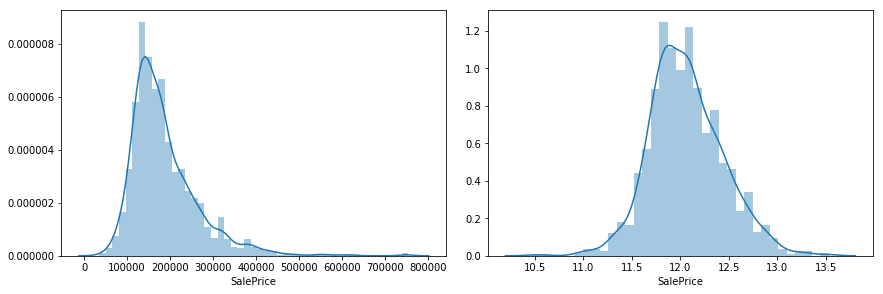

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
plt.tight_layout()

sns.distplot(np.log(df.SalePrice), ax = ax[1], label='Log of Price')

sns.distplot(df.SalePrice, ax = ax[0], label='Distribution of Sale Price')
plt.show()


In [8]:
scipy.stats.skew(df.SalePrice, axis=0, bias=True)

1.9415059461368915

In [9]:
df.SalePrice.describe()

count      1338.000000
mean     186761.782511
std       78913.847668
min       35311.000000
25%      135000.000000
50%      168500.000000
75%      220000.000000
max      755000.000000
Name: SalePrice, dtype: float64

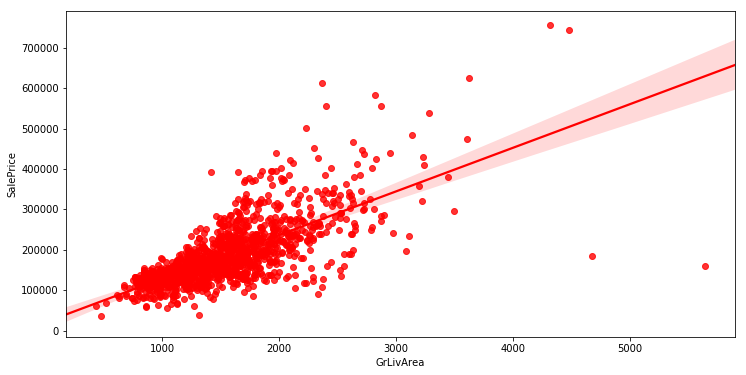

In [10]:
plt.figure(figsize = (12, 6))
sns.regplot(x='GrLivArea', y='SalePrice', data=df, color='red')
plt.show()

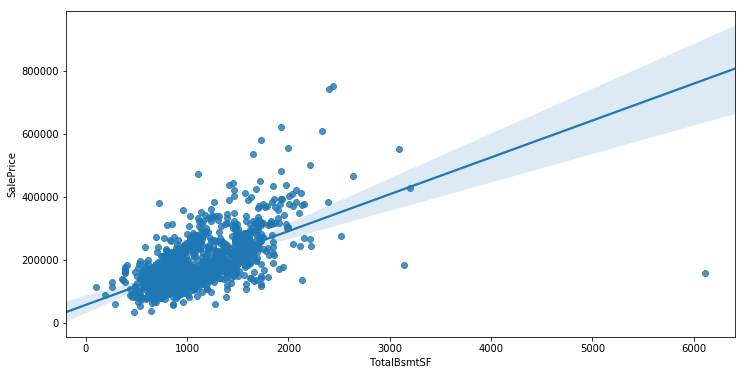

In [11]:
plt.figure(figsize = (12, 6))
sns.regplot(x='TotalBsmtSF', y='SalePrice', data=df,)
plt.show()

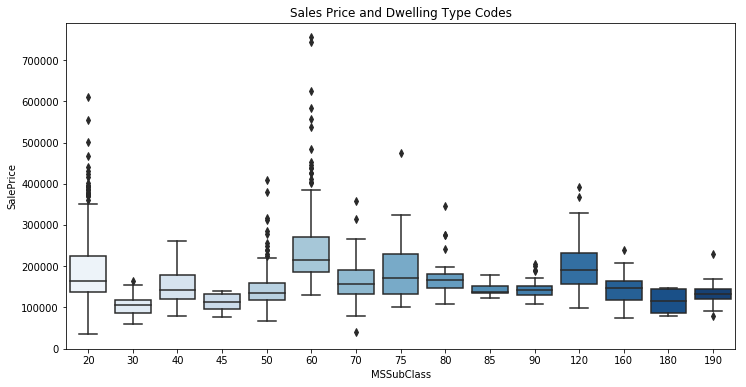

In [12]:
plt.figure(figsize = (12, 6))
sns.boxplot(x='MSSubClass', y='SalePrice', data=df, palette="Blues")
plt.title('Sales Price and Dwelling Type Codes')
plt.show()

MSSubClass Codes:

- 20:	1-STORY 1946 & NEWER ALL STYLES
- 30:	1-STORY 1945 & OLDER
- 40:	1-STORY W/FINISHED ATTIC ALL AGES
- 45:	1-1/2 STORY - UNFINISHED ALL AGES
- 50:	1-1/2 STORY FINISHED ALL AGES
- 60:	2-STORY 1946 & NEWER 
- 70:	2-STORY 1945 & OLDER
- 75:	2-1/2 STORY ALL AGES
- 80:	SPLIT OR MULTI-LEVEL
- 85:	SPLIT FOYER
- 90:	DUPLEX - ALL STYLES AND AGES
- 120:	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
- 150:	1-1/2 STORY PUD - ALL AGES
- 160:	2-STORY PUD - 1946 & NEWER
- 180:	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
- 190:	2 FAMILY CONVERSION - ALL STYLES AND AGES

The Plot reveals 2-Story homes bulit after 1945 are priced higher on average while 1-story 1945 & older have the lowest average sale price.

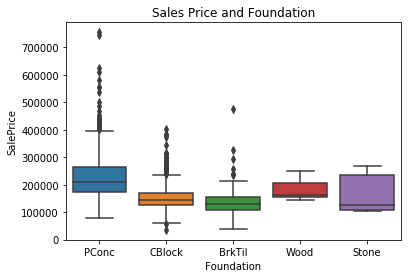

In [13]:
sns.boxplot(x='Foundation', y='SalePrice', data=df)
plt.title('Sales Price and Foundation')
plt.show()

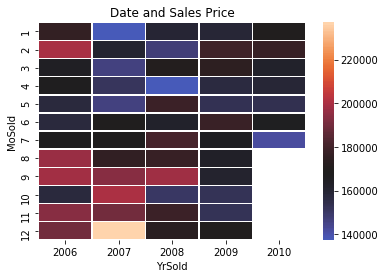

In [14]:
pt = df.pivot_table("SalePrice", "MoSold", "YrSold", aggfunc='median')
ax = sns.heatmap(pt, linewidths=.5, center=np.median(df.SalePrice))
plt.title('Date and Sales Price')
plt.show()

Looking at the heatmap of sales price and homes we can see that housing prices peaked in late 2007 then started to decline. This decline coinsides with the decline in the average Sales price of homes in the US

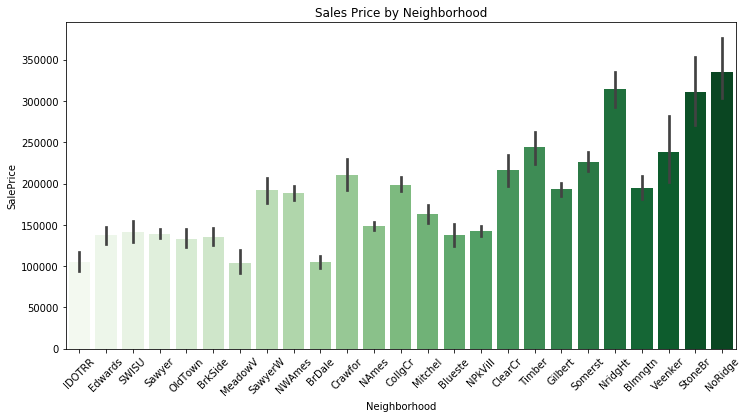

In [15]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Neighborhood', y = 'SalePrice', data = df.sort_values(by='SalePrice'), palette='Greens')
xt = plt.xticks(rotation=45)
plt.title('Sales Price by Neighborhood')
plt.show()

The Plot reveals that 'NoRidge', 'StoneBr', and 'NridgeHt' neighborhoods have the highest priced homes.

In [16]:
#investigate feature of above neighborhood homes.
chomes = df[df['Neighborhood'] == 'MeadowV']
ahomes = df[df['Neighborhood'] == 'BrDale']
bhomes = df[df['Neighborhood'] == 'IDOTRR']

df.GrLivArea.describe()

count    1338.000000
mean     1537.585202
std       520.579960
min       438.000000
25%      1160.000000
50%      1480.000000
75%      1791.500000
max      5642.000000
Name: GrLivArea, dtype: float64

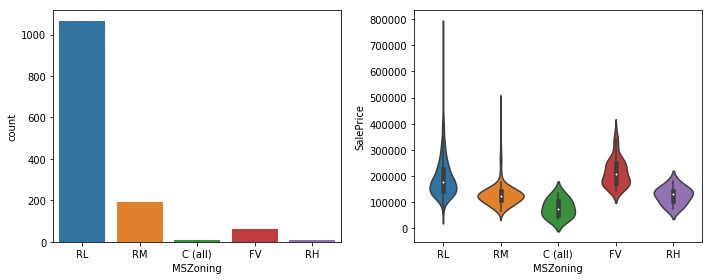

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.violinplot(x = 'MSZoning', y = 'SalePrice', data = df)
sns.countplot('MSZoning', data = df,ax = ax[0])
plt.tight_layout()
plt.show()

#### MSZoning Codes:
 - A:	Agriculture
 - C:	Commercial
 - FV:	Floating Village Residential
 - I:	Industrial
 - RH:	Residential High Density
 - RL:	Residential Low Density
 - RP:	Residential Low Density Park 
 - RM:	Residential Medium Density

Statistical Analysis

In [18]:
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from collections import defaultdict

In [19]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

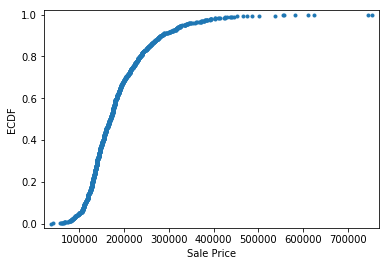

In [20]:
x, y = ecdf(df.SalePrice)

plt.plot(x, y, marker = '.', linestyle = 'none')

# Make the margins nice
plt.margins(.02)

# Label the axes
plt.ylabel('ECDF')
plt.xlabel('Sale Price')

# Display the plot
plt.show()

In [21]:
# Calculate the Correlation between Continuous Variables and Sale Price:
resdict = defaultdict(list)
corr_mat = df.corr()
cor_dict = corr_mat['SalePrice'].to_dict()
del cor_dict['SalePrice']
print("List the numerical features decendingly by their correlation with Sale Price:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))
    resdict[ele[0]].append(ele)

List the numerical features decendingly by their correlation with Sale Price:

OverallQual: 	0.7835456113843237
GrLivArea: 	0.7117061511024302
GarageCars: 	0.6401543580531925
GarageArea: 	0.6075353838509889
1stFlrSF: 	0.6047144846292783
TotalBsmtSF: 	0.6020422814414277
FullBath: 	0.5693126295659892
TotRmsAbvGrd: 	0.5518206950104778
YearBuilt: 	0.504297175093091
YearRemodAdd: 	0.5014353821077956
GarageYrBlt: 	0.48172978591824045
MasVnrArea: 	0.46581143360024846
Fireplaces: 	0.4454344326389212
BsmtFinSF1: 	0.35967663312618064
OpenPorchSF: 	0.3227857346419753
2ndFlrSF: 	0.31135402669959245
WoodDeckSF: 	0.30598288316822747
HalfBath: 	0.2581749248797554
LotArea: 	0.2547573502139699
BsmtFullBath: 	0.20969465592752243
BsmtUnfSF: 	0.1916888789020209
BedroomAbvGr: 	0.16926554693331156
EnclosedPorch: 	-0.12738527654209783
KitchenAbvGr: 	-0.1114081974082277
OverallCond: 	-0.1086270972695443
ScreenPorch: 	0.0966239807980718
PoolArea: 	0.091881076190269
MSSubClass: 	-0.07959851790075388
3SsnPorch: 

In [22]:
# Place Highly correlated Variables in Dataframe:
dfres1 = pd.DataFrame.from_dict(resdict, orient='index')
dfres1 = dfres1[0].apply(pd.Series).drop(0, axis=1)
dfres1.columns = ['Correlation']
Hcv = dfres1[dfres1['Correlation'] > .5]


In [23]:
dfres1

,Correlation
OverallQual,0.783546
GrLivArea,0.711706
GarageCars,0.640154
GarageArea,0.607535
1stFlrSF,0.604714
TotalBsmtSF,0.602042
FullBath,0.569313
TotRmsAbvGrd,0.551821
YearBuilt,0.504297
YearRemodAdd,0.501435


In [24]:
# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(df.GrLivArea, df.SalePrice,1)

# Print the results to the screen
print('slope =', a, )
print('intercept =', b, )

slope = 107.8863480816208
intercept = 20877.33022534415


In [25]:
dfres1.index

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF',
       'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'OpenPorchSF',
       '2ndFlrSF', 'WoodDeckSF', 'HalfBath', 'LotArea', 'BsmtFullBath',
       'BsmtUnfSF', 'BedroomAbvGr', 'EnclosedPorch', 'KitchenAbvGr',
       'OverallCond', 'ScreenPorch', 'PoolArea', 'MSSubClass', '3SsnPorch',
       'MoSold', 'BsmtFinSF2', 'BsmtHalfBath', 'YrSold', 'MiscVal',
       'LowQualFinSF'],
      dtype='object')

In [26]:
for x in dfres1.index:
    a, b = np.polyfit(df[x], df.SalePrice,1)
    print(x)
    print('Slope :',a)
    print('Intercept :',b,'\n')


OverallQual
Slope : 46684.72747139708
Intercept : -103604.66144765816 

GrLivArea
Slope : 107.8863480816208
Intercept : 20877.33022534415 

GarageCars
Slope : 79644.74781574441
Intercept : 37710.62516395813 

GarageArea
Slope : 256.7063426579952
Intercept : 58036.406171184426 

1stFlrSF
Slope : 123.42161027537503
Intercept : 41590.57255064941 

TotalBsmtSF
Slope : 117.14696918730094
Intercept : 58374.83304713307 

FullBath
Slope : 82047.38588144051
Intercept : 57497.291152409125 

TotRmsAbvGrd
Slope : 27472.77514875843
Intercept : 6813.052015157939 

YearBuilt
Slope : 1346.1185850337013
Intercept : -2469169.422400653 

YearRemodAdd
Slope : 1949.6104429714828
Intercept : -3684519.0584063586 

GarageYrBlt
Slope : 1534.4937290025023
Intercept : -2849382.004782902 

MasVnrArea
Slope : 198.0496700522062
Intercept : 164904.9735581099 

Fireplaces
Slope : 54464.433647012105
Intercept : 151429.1005937172 

BsmtFinSF1
Slope : 61.86559712400171
Intercept : 158041.62691241768 

OpenPorchSF
Slope 

In [27]:
def pearson_r(x, y):
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

In [28]:
def test_corr(cols, df=df):
    r_obs = pearson_r(cols, df.SalePrice.values)
    perm_replicates = np.empty(10000)

    for i in range(10000):
        cols_permuted = np.random.permutation(cols)
        perm_replicates[i] = pearson_r(cols_permuted, df.SalePrice.values)

    p = np.sum(perm_replicates >= r_obs ) / len(perm_replicates)
    return print('p-val =', p)

In [29]:
for x in dfres1.index :
    if dfres1.loc[x][0] > .5:
        print('\n',x)
        test_corr(df[x].values)


 OverallQual
p-val = 0.0

 GrLivArea
p-val = 0.0

 GarageCars
p-val = 0.0

 GarageArea
p-val = 0.0

 1stFlrSF
p-val = 0.0

 TotalBsmtSF
p-val = 0.0

 FullBath
p-val = 0.0

 TotRmsAbvGrd
p-val = 0.0

 YearBuilt
p-val = 0.0

 YearRemodAdd
p-val = 0.0


In [30]:
def Chi_test(data,c1,c2):
    #combine columns into matrix
    table = pd.crosstab(data[c1], data[c2])
    
    colsum = table.sum(axis=0)
    colpct = table / colsum
    cstable = stats.chi2_contingency(table)
    

    return cstable[0], cstable[1], cstable[2]

In [31]:
objectcl = df.loc[:, df.dtypes == 'object'].columns

In [32]:
# Split Homes by Sale price in 'LPH' and 'HPH':
SPavg = np.mean(df.SalePrice)

bins = [0, SPavg, max(df.SalePrice)+1]

bin_names = ['LPH', 'HPH']

df1 = df.copy()

df1['SPcat'] = pd.cut(df1['SalePrice'], bins, labels=bin_names)

HPH = df1[df1['SalePrice'] >= SPavg ]
LPH = df1[df1['SalePrice'] < SPavg ]

In [33]:
from collections import defaultdict

In [34]:
# Chi-Squared test on Categorical data in DF and filter out variables that have failed test:
res = defaultdict(list)
for x in objectcl:
    Chi_test(df1, x, 'SPcat')
    if Chi_test(df1, x, 'SPcat')[1] < .01 and Chi_test(df1, x, 'SPcat')[2] > 3:
        res[x].append(list(Chi_test(df1, x, 'SPcat')))

In [35]:
#view result in DataFrame:
dfres = pd.DataFrame.from_dict(res, orient='index')
dfres = dfres[0].apply(pd.Series)
columns = ['Chi Statistic','P-Value','Expected Value']
dfres.columns = columns

In [36]:
dfres

,Chi Statistic,P-Value,Expected Value
MSZoning,118.999292,8.737456e-25,4.0
LotConfig,22.748768,1.421318e-04,4.0
Neighborhood,578.482502,7.474895e-107,24.0
Condition1,47.780758,1.088021e-07,8.0
BldgType,31.396279,2.541281e-06,4.0
HouseStyle,118.886455,1.306626e-22,7.0
RoofStyle,15.962580,6.951727e-03,5.0
Exterior1st,241.605635,3.534012e-44,13.0
Exterior2nd,240.270008,1.246502e-42,15.0
Foundation,318.608577,1.047060e-67,4.0


In [37]:
catcol = list(dfres.index)
numcol = list(dfres1.index)

In [38]:
predV = catcol + numcol

In [39]:
import sklearn.preprocessing as prep

In [40]:
train = df[predV]

dfcat = df[catcol]

In [41]:
train 

,MSZoning,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,Foundation,...,ScreenPorch,PoolArea,MSSubClass,3SsnPorch,MoSold,BsmtFinSF2,BsmtHalfBath,YrSold,MiscVal,LowQualFinSF
0,RL,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,PConc,...,0,0,60,0,2,0,0,2008,0,0
1,RL,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,CBlock,...,0,0,20,0,5,0,1,2007,0,0
2,RL,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,PConc,...,0,0,60,0,9,0,0,2008,0,0
3,RL,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,BrkTil,...,0,0,70,0,2,0,0,2006,0,0
4,RL,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,PConc,...,0,0,60,0,12,0,0,2008,0,0
5,RL,Inside,Mitchel,Norm,1Fam,1.5Fin,Gable,VinylSd,VinylSd,Wood,...,0,0,50,320,10,0,0,2009,700,0
6,RL,Inside,Somerst,Norm,1Fam,1Story,Gable,VinylSd,VinylSd,PConc,...,0,0,20,0,8,0,0,2007,0,0
7,RL,Corner,NWAmes,PosN,1Fam,2Story,Gable,HdBoard,HdBoard,CBlock,...,0,0,60,0,11,32,0,2009,350,0
8,RM,Inside,OldTown,Artery,1Fam,1.5Fin,Gable,BrkFace,Wd Shng,BrkTil,...,0,0,50,0,4,0,0,2008,0,0
9,RL,Corner,BrkSide,Artery,2fmCon,1.5Unf,Gable,MetalSd,MetalSd,BrkTil,...,0,0,190,0,1,0,0,2008,0,0
